<a href="https://colab.research.google.com/github/ArtNellas/Colabs/blob/main/Copy_of_ML_Midterms_Nellas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Master Run

##Importing and Loading

In [ ]:
import os
import re
import PIL
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Midterms/TSLA_stock_data.csv')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3587,2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700
3588,2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600
3589,2024-10-02,247.550003,251.160004,241.500000,249.020004,249.020004,93983900
3590,2024-10-03,244.479996,249.789993,237.809998,240.660004,240.660004,80729200


##Null and Dupes

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3587,2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700
3588,2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600
3589,2024-10-02,247.550003,251.160004,241.500000,249.020004,249.020004,93983900
3590,2024-10-03,244.479996,249.789993,237.809998,240.660004,240.660004,80729200


In [ ]:
print(f"Number of duplicates: {np.sum(df.duplicated())}")

df.drop_duplicates(inplace = True)

print(f"Number of duplicates after: {np.sum(df.duplicated())}")

Number of duplicates: 0
Number of duplicates after: 0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

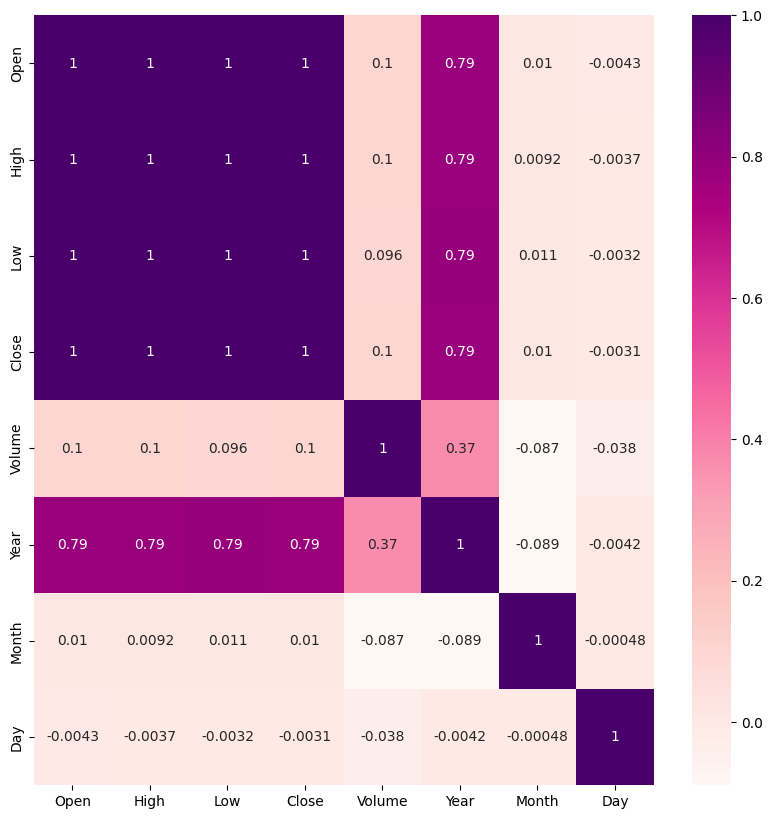

In [ ]:
corr_matrix = df[['Open',	'High',	'Low',	'Close',	'Volume', 'Year', 'Month', 'Day']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True, cmap ='RdPu')
plt.show()

##Graphs

In [ ]:
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,2010,6,29
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,2010,6,30
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,2010,7,1
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,2010,7,2
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,2010,7,6
...,...,...,...,...,...,...,...,...,...,...
3587,2024-09-30,259.040009,264.859985,255.770004,261.630005,261.630005,80705700,2024,9,30
3588,2024-10-01,262.670013,263.980011,248.529999,258.019989,258.019989,87397600,2024,10,1
3589,2024-10-02,247.550003,251.160004,241.500000,249.020004,249.020004,93983900,2024,10,2
3590,2024-10-03,244.479996,249.789993,237.809998,240.660004,240.660004,80729200,2024,10,3


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Open']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Open')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

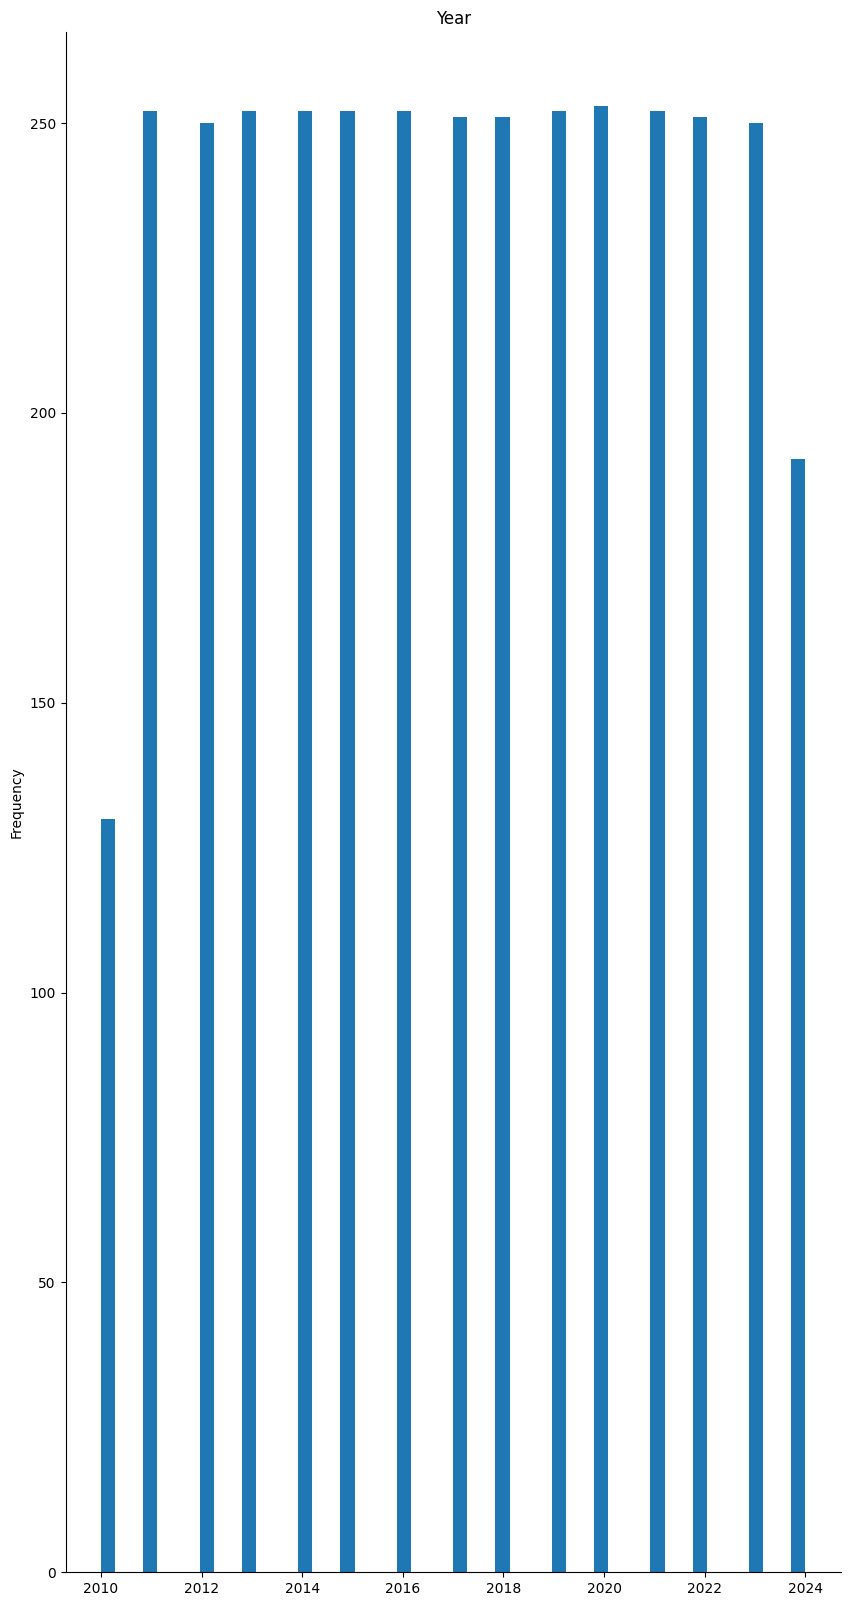

In [ ]:
from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=50, title='Year', figsize=(10,20))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['Year'].value_counts()

,count
Year,
2020,253
2011,252
2013,252
2014,252
2015,252
2016,252
2019,252
2021,252
2017,251


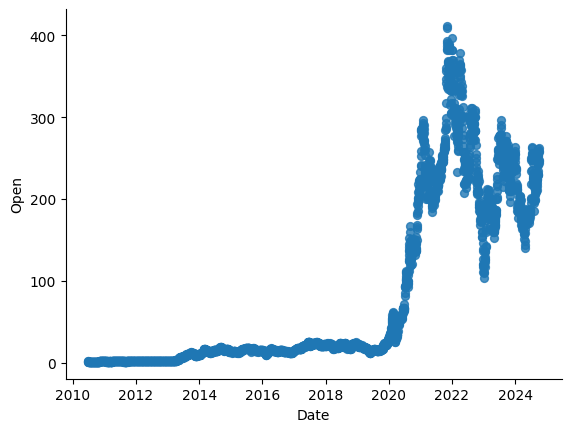

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Date', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

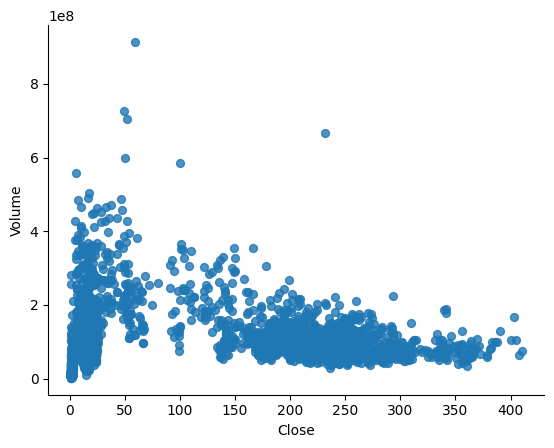

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

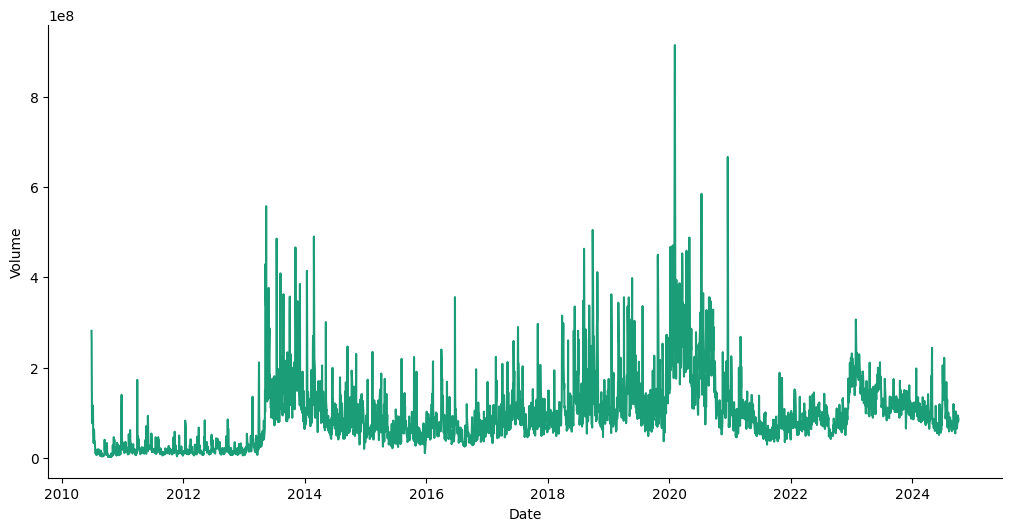

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Volume']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Volume')

##Modifying the Dataframe (With High Correlation)

In [ ]:
df1 = df.drop(['Adj Close', 'Date'], axis = 1)

In [ ]:
display(df1)

,Open,High,Low,Close,Volume,Year,Month,Day
0,1.266667,1.666667,1.169333,1.592667,281494500,2010,6,29
1,1.719333,2.028000,1.553333,1.588667,257806500,2010,6,30
2,1.666667,1.728000,1.351333,1.464000,123282000,2010,7,1
3,1.533333,1.540000,1.247333,1.280000,77097000,2010,7,2
4,1.333333,1.333333,1.055333,1.074000,103003500,2010,7,6
...,...,...,...,...,...,...,...,...
3587,259.040009,264.859985,255.770004,261.630005,80705700,2024,9,30
3588,262.670013,263.980011,248.529999,258.019989,87397600,2024,10,1
3589,247.550003,251.160004,241.500000,249.020004,93983900,2024,10,2
3590,244.479996,249.789993,237.809998,240.660004,80729200,2024,10,3


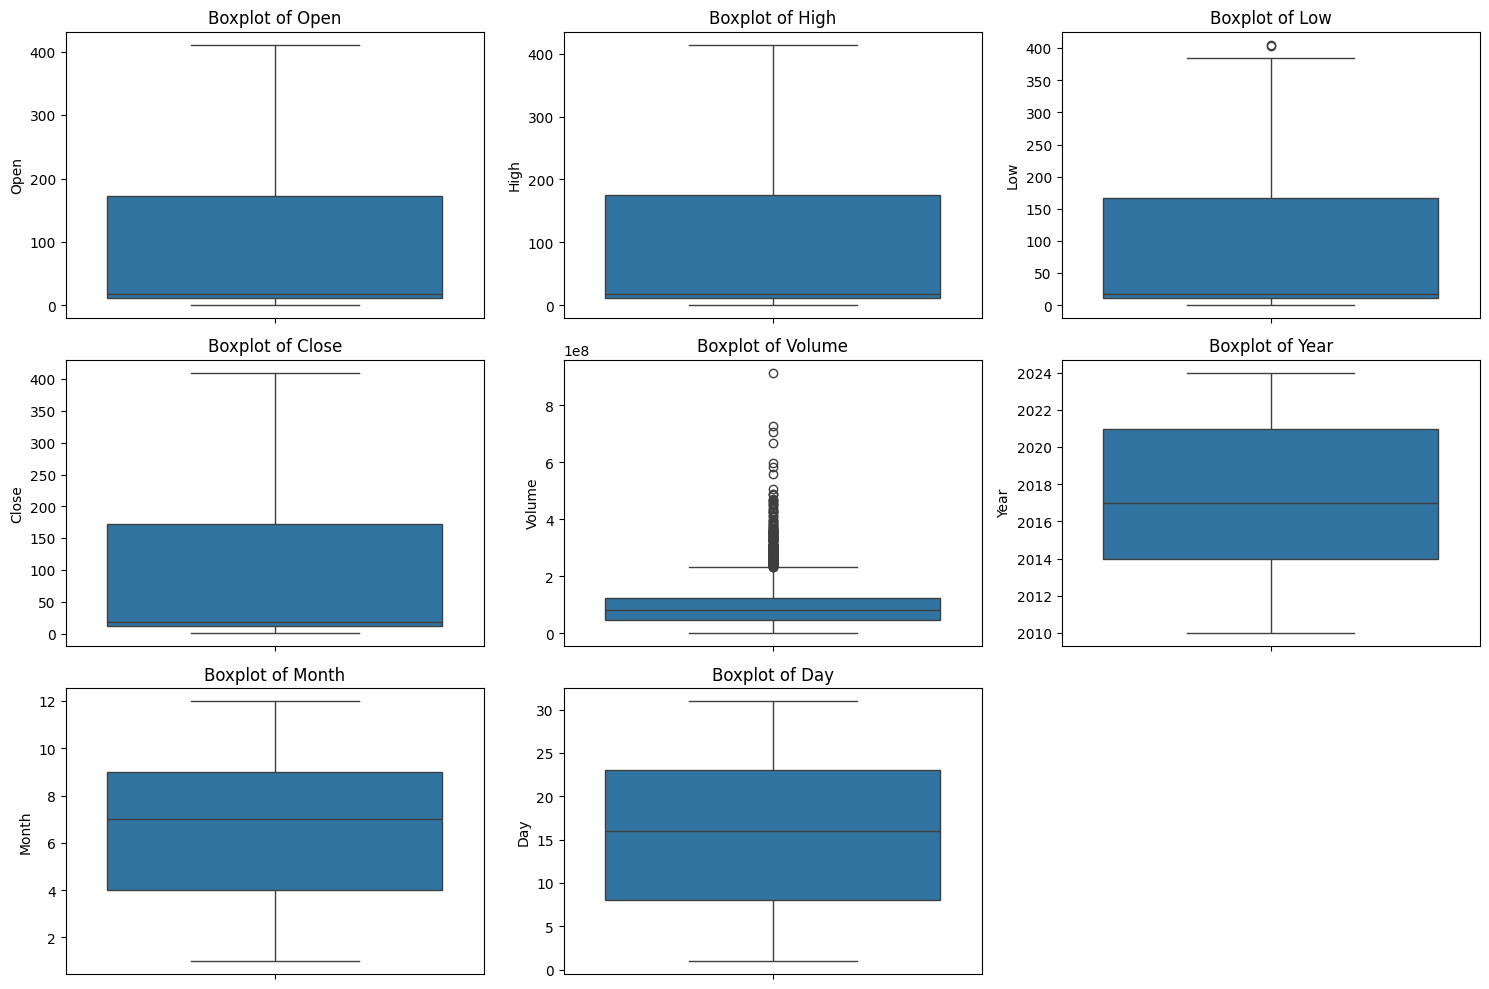

In [ ]:
numeric_columns = ['Open',	'High',	'Low',	'Close',	'Volume','Year', 'Month', 'Day']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
     plt.subplot(3, 3, i)
     sns.boxplot(df[column])
     plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
df1['Low'] = np.log(df1['Low'] + 1)
df1['Volume'] = np.log(df1['Volume'] + 1)

In [ ]:
display(df1)

,Open,High,Low,Close,Volume,Year,Month,Day
0,1.266667,1.666667,0.774420,1.592667,19.455623,2010,6,29
1,1.719333,2.028000,0.937400,1.588667,19.367720,2010,6,30
2,1.666667,1.728000,0.854982,1.464000,18.629985,2010,7,1
3,1.533333,1.540000,0.809744,1.280000,18.160575,2010,7,2
4,1.333333,1.333333,0.720438,1.074000,18.450274,2010,7,6
...,...,...,...,...,...,...,...,...
3587,259.040009,264.859985,5.548181,261.630005,18.206320,2024,9,30
3588,262.670013,263.980011,5.519579,258.019989,18.285978,2024,10,1
3589,247.550003,251.160004,5.491002,249.020004,18.358634,2024,10,2
3590,244.479996,249.789993,5.475668,240.660004,18.206611,2024,10,3


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(df[['Open',	'High',	'Low',	'Close',	'Volume']])

In [ ]:
scaler2 = MinMaxScaler()
df1[['Year','Month','Day']] = scaler.fit_transform(df1[['Year', 'Month', 'Day']])

In [ ]:
display(df1)

,Open,High,Low,Close,Volume,Year,Month,Day
0,1.266667,1.666667,0.774420,1.592667,19.455623,-1.721259,-0.168223,1.515208
1,1.719333,2.028000,0.937400,1.588667,19.367720,-1.721259,-0.168223,1.629337
2,1.666667,1.728000,0.854982,1.464000,18.629985,-1.721259,0.125676,-1.680429
3,1.533333,1.540000,0.809744,1.280000,18.160575,-1.721259,0.125676,-1.566299
4,1.333333,1.333333,0.720438,1.074000,18.450274,-1.721259,0.125676,-1.109780
...,...,...,...,...,...,...,...,...
3587,259.040009,264.859985,5.548181,261.630005,18.206320,1.663509,0.713475,1.629337
3588,262.670013,263.980011,5.519579,258.019989,18.285978,1.663509,1.007375,-1.680429
3589,247.550003,251.160004,5.491002,249.020004,18.358634,1.663509,1.007375,-1.566299
3590,244.479996,249.789993,5.475668,240.660004,18.206611,1.663509,1.007375,-1.452169


##Modifying the Dataframe(Without High Correlation)

In [ ]:
df2 = df.drop(['High', 'Low', 'Open', 'Date', 'Adj Close'], axis = 1)

In [ ]:
display(df2)

,Close,Volume,Year,Month,Day
0,1.592667,281494500,2010,6,29
1,1.588667,257806500,2010,6,30
2,1.464000,123282000,2010,7,1
3,1.280000,77097000,2010,7,2
4,1.074000,103003500,2010,7,6
...,...,...,...,...,...
3587,261.630005,80705700,2024,9,30
3588,258.019989,87397600,2024,10,1
3589,249.020004,93983900,2024,10,2
3590,240.660004,80729200,2024,10,3


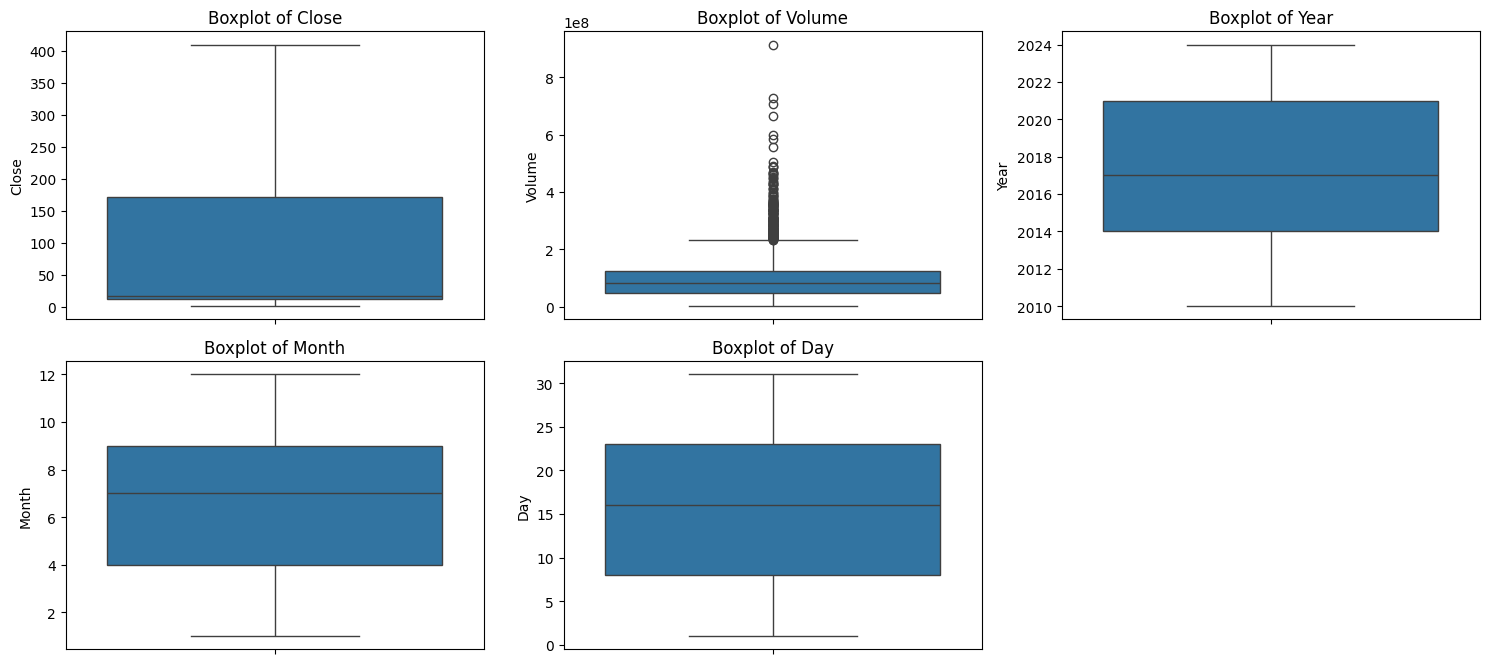

In [ ]:
numeric_columns = ['Close', 'Volume', 'Year', 'Month', 'Day']
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
     plt.subplot(3, 3, i)
     sns.boxplot(df[column])
     plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [ ]:
df2['Volume'] = np.log(df2['Volume'] + 1)

In [ ]:
scaler = StandardScaler()
X2 = scaler.fit_transform(df2[['Close',	'Volume']])

In [ ]:
scalerMM = MinMaxScaler()
df2[['Year','Month','Day']] = scaler.fit_transform(df2[['Year', 'Month', 'Day']])

#Linear Regression


##With Highly Correlated

###Training and Testing (Keeping Highly Correlated)

In [ ]:
X = df1.drop('Close', axis=1)
y = df1['Close']

In [ ]:
print(X.shape, y.shape)

(3592, 7) (3592,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("RMSE: ", math.sqrt(mse))
print("R2 Score: ", r2)

Mean Squared Error:  6.647813750540058
RMSE:  2.578335461211372
R2 Score:  0.9993957043329861


In [ ]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [-0.32899769  1.28736816  1.0379985  -0.88125287 -0.01477355  0.06953547
 -0.00579373]
Intercept:  13.544619585908038


###Metric Interpretations

- **Decisions to drop**: The chosen columns [`Adj close, Date`] were dropped for different reasons. The `Adj close` column was dropped as it was identical of another column, `Close`. Thus, it is safe to drop either one. the `Date` column was dropped as it was split into three new columns, namely `Year`, `Month`, and `Day`. This is a method to ensure that the details that belong in column will not be only be expanded upon, but also reduce the risk of syntax errors in the model.

- **RMSE**: The yielded RMSE is approximately 2.58. This means that the predicted values of the model would have an Positive-Negative 2.57 difference from the actual values. Relatively speaking, this is a good indicator that our model has a good level of accuracy.

- **Coefficients**: The highest coefficient value form the dataframe is
 1.28736816. This means that the factor that has the highest impact to the predictions is `High`. In comparison, while there are a couple of columns that are close to the level of impact the `High` column had, a considerable number of the columns are not that impactful to the predictions of the model.

- **Intercept**: The yielded intercept value is approximately `13.54`. This means that when all X-values are equated to 0, the predicted value for `Close` would be `13.54`.

##Without Highly Correlated

In [ ]:
X = df2.drop('Close', axis=1)
y = df2['Close']

In [ ]:
print(X.shape, y.shape)

(3592, 4) (3592,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 29)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("RMSE: ", math.sqrt(mse))
print("R2 Score: ", r2)

Mean Squared Error:  3389.1598642623753
RMSE:  58.21649134276623
R2 Score:  0.6919205775545767


In [ ]:
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [-36.13292141 101.15371603   6.70429897  -0.88000281]
Intercept:  729.1339447727586


#SVR

In [ ]:
print(y)

0         1.592667
1         1.588667
2         1.464000
3         1.280000
4         1.074000
           ...    
3587    261.630005
3588    258.019989
3589    249.020004
3590    240.660004
3591    250.080002
Name: Close, Length: 3592, dtype: float64


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
X = df1.drop('Close', axis=1)
y = df1['Close']

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X2 = sc_X.fit_transform(X)
y2 = sc_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X2, y2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
print(X2)

[[-0.73780944 -0.73409071 -1.58612158 ... -1.72125946 -0.16822311
   1.51520756]
 [-0.73342534 -0.73066704 -1.48218373 ... -1.72125946 -0.16822311
   1.62933744]
 [-0.73393542 -0.73350958 -1.53474399 ... -1.72125946  0.12567641
  -1.68042898]
 ...
 [ 1.64745921  1.62988449  1.42180472 ...  1.66350946  1.00737495
  -1.56629911]
 [ 1.617726    1.6169035   1.41202604 ...  1.66350946  1.00737495
  -1.45216923]
 [ 1.63913005  1.6279895   1.4298536  ...  1.66350946  1.00737495
  -1.33803935]]


In [ ]:
y_pred = regressor.predict([[1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]]).reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[[140.390941]]
